## Importing the tweets using the twitter search API

In [1]:
import tweepy 
import pandas as pd
import sys
import csv
import twitter

consumer_key='qNiCgAd0BPTLNOCjEJE3NYpHD'
consumer_secret='X1v73AqZPfMm1Jd2gwZmmy9iJWjQTT6k8Shi0eBoJJSOaFhX3z'
access_token_key='1306319315629731843-Ixy78hSGwUiYx5zp8ajIAQH9Cz0YRV'
access_token_secret='Sdbinea6vnD6Jq2mnjBLW1fVC6vRrU2H2rL5ZdIVkBiYV'
  
# Fill the X's with the credentials obtained by  
# following the above mentioned procedure. 

api = twitter.Api(consumer_key='qNiCgAd0BPTLNOCjEJE3NYpHD',
                      consumer_secret='X1v73AqZPfMm1Jd2gwZmmy9iJWjQTT6k8Shi0eBoJJSOaFhX3z',
                      access_token_key='1306319315629731843-Ixy78hSGwUiYx5zp8ajIAQH9Cz0YRV',
                      access_token_secret='Sdbinea6vnD6Jq2mnjBLW1fVC6vRrU2H2rL5ZdIVkBiYV')
  
# Function to extract tweets 
def get_tweets(username): 
          
        # Authorization to consumer key and consumer secret 
        auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
  
        # Access to user's access key and access secret 
        auth.set_access_token(access_token_key, access_token_secret) 
  
        # Calling api 
        api = tweepy.API(auth) 
        #set count to however many tweets you want - max count is 3200 and this doesn't have any effect if it is more than 3200
#        number_of_tweets = 5000
       
        tfile = []
        for tweet in tweepy.Cursor(api.user_timeline, screen_name = username).items():

        #username, tweet id, date/time, text
            tfile.append([username, tweet.id_str,tweet.source, tweet.created_at,tweet.retweet_count,tweet.favorite_count, tweet.text.encode("utf-8")])

	#write to a new csv file from the array of tweets
        outfile = username + "_tweets_V1.csv"
        print ("writing to " + outfile)
        with open(outfile, 'w+') as file:
            writer = csv.writer(file, delimiter=',')
            writer.writerow(['User_Name', 'Tweet_ID', 'Source', 'Created_date','Retweet_count','Favorite_count','Tweet'])
            writer.writerows(tfile)
# user name
get_tweets("@POTUS")  

writing to @POTUS_tweets_V1.csv


## Creating a pandas dataframe for data analysis

In [2]:
import pandas as pd
df= pd.read_csv("@POTUS_tweets_V1.csv",encoding='utf-8') 
df.head(10)

,User_Name,Tweet_ID,Source,Created_date,Retweet_count,Favorite_count,Tweet
0,@POTUS,1312869110448033796,TheWhiteHouse,2020-10-04 21:36:02,99305,0,b'RT @realDonaldTrump: https://t.co/0Bm9W2u1x7'
1,@POTUS,1312449374526402563,TheWhiteHouse,2020-10-03 17:48:09,92265,0,b'RT @realDonaldTrump: OUR GREAT USA WANTS &am...
2,@POTUS,1312442567267479553,TheWhiteHouse,2020-10-03 17:21:06,100356,0,"b'RT @realDonaldTrump: Doctors, Nurses and ALL..."
3,@POTUS,1312379538698108929,TheWhiteHouse,2020-10-03 13:10:39,140425,0,"b'RT @realDonaldTrump: Going welI, I think! Th..."
4,@POTUS,1312158667706310656,TheWhiteHouse,2020-10-02 22:32:59,132178,0,b'RT @realDonaldTrump: https://t.co/B4H105KVSs'
5,@POTUS,1311894735808856064,TheWhiteHouse,2020-10-02 05:04:13,417209,0,"b'RT @realDonaldTrump: Tonight, @FLOTUS and I ..."
6,@POTUS,1311786017003839488,TheWhiteHouse,2020-10-01 21:52:12,18975,0,b'RT @realDonaldTrump: Will be interviewed ton...
7,@POTUS,1311722891810140161,TheWhiteHouse,2020-10-01 17:41:22,2586,0,b'RT @WhiteHouse: President @realDonaldTrump d...
8,@POTUS,1311388583551434752,TheWhiteHouse,2020-09-30 19:32:57,2894,0,b'RT @WhiteHouse: President @realDonaldTrump i...
9,@POTUS,1310673641856696327,TheWhiteHouse,2020-09-28 20:12:02,1862,0,b'RT @WhiteHouse: Another 100 million rapid po...


## Data Cleaning Text Normalization and removal of special characters

In [3]:
from nltk.tokenize import WordPunctTokenizer
from bs4 import BeautifulSoup
import re
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

In [4]:
df['Tweet'] = df['Tweet'].apply(tweet_cleaner)
df.head(20)

,User_Name,Tweet_ID,Source,Created_date,Retweet_count,Favorite_count,Tweet
0,@POTUS,1312869110448033796,TheWhiteHouse,2020-10-04 21:36:02,99305,0,b rt
1,@POTUS,1312449374526402563,TheWhiteHouse,2020-10-03 17:48:09,92265,0,b rt our great usa wants needs stimulus work t...
2,@POTUS,1312442567267479553,TheWhiteHouse,2020-10-03 17:21:06,100356,0,b rt doctors nurses and all at the great walte...
3,@POTUS,1312379538698108929,TheWhiteHouse,2020-10-03 13:10:39,140425,0,b rt going weli i think thank you to all love
4,@POTUS,1312158667706310656,TheWhiteHouse,2020-10-02 22:32:59,132178,0,b rt
5,@POTUS,1311894735808856064,TheWhiteHouse,2020-10-02 05:04:13,417209,0,b rt tonight and i tested positive for covid w...
6,@POTUS,1311786017003839488,TheWhiteHouse,2020-10-01 21:52:12,18975,0,b rt will be interviewed tonight by at enjoy
7,@POTUS,1311722891810140161,TheWhiteHouse,2020-10-01 17:41:22,2586,0,b rt president departs for new jersey
8,@POTUS,1311388583551434752,TheWhiteHouse,2020-09-30 19:32:57,2894,0,b rt president is wheels up for minnesota
9,@POTUS,1310673641856696327,TheWhiteHouse,2020-09-28 20:12:02,1862,0,b rt another million rapid point of care tests...


## Removal of stop words and final cleaned up data set

In [5]:
from nltk.corpus import stopwords
from nltk import PorterStemmer
import contractions
ps = PorterStemmer()

stopword = list(stopwords.words('english'))
l = ['b','xe','x','xa','n','rt','xd','xaf','xb','xba','xf','th','https']
stopword = stopword + l

def cl_text(text):
    text = ' '.join(word for word in text.split() if word not in stopword)
    return text

df['Tweet']=df['Tweet'].apply(cl_text)
df.head(20)



,User_Name,Tweet_ID,Source,Created_date,Retweet_count,Favorite_count,Tweet
0,@POTUS,1312869110448033796,TheWhiteHouse,2020-10-04 21:36:02,99305,0,
1,@POTUS,1312449374526402563,TheWhiteHouse,2020-10-03 17:48:09,92265,0,great usa wants needs stimulus work together g...
2,@POTUS,1312442567267479553,TheWhiteHouse,2020-10-03 17:21:06,100356,0,doctors nurses great walter reed medical cente...
3,@POTUS,1312379538698108929,TheWhiteHouse,2020-10-03 13:10:39,140425,0,going weli think thank love
4,@POTUS,1312158667706310656,TheWhiteHouse,2020-10-02 22:32:59,132178,0,
5,@POTUS,1311894735808856064,TheWhiteHouse,2020-10-02 05:04:13,417209,0,tonight tested positive covid begin quarantine...
6,@POTUS,1311786017003839488,TheWhiteHouse,2020-10-01 21:52:12,18975,0,interviewed tonight enjoy
7,@POTUS,1311722891810140161,TheWhiteHouse,2020-10-01 17:41:22,2586,0,president departs new jersey
8,@POTUS,1311388583551434752,TheWhiteHouse,2020-09-30 19:32:57,2894,0,president wheels minnesota
9,@POTUS,1310673641856696327,TheWhiteHouse,2020-09-28 20:12:02,1862,0,another million rapid point care tests support...


## Sentiment Analyzer using VADER

In [6]:
import nltk
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

def sentiment_analyzer_scores(text):
    score = sentiment.polarity_scores(text)
    lb = score['compound']
    if lb >= 0.05:
        return 1
    elif (lb > -0.05) and (lb < 0.05):
        return 0
    else:
        return -1
    
    
df['VSA'] = np.array([ sentiment_analyzer_scores(tweet) for tweet in df['Tweet'] ])

pos_tweets = [ tweet for index, tweet in enumerate(df['Tweet']) if df['VSA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(df['Tweet']) if df['VSA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(df['Tweet']) if df['VSA'][index] < 0]

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(df['Tweet'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(df['Tweet'])))
print("Percentage of negative tweets: {}%".format(len(neg_tweets)*100/len(df['Tweet'])))

Percentage of positive tweets: 49.73561430793157%
Percentage of neutral tweets: 27.40279937791602%
Percentage of negative tweets: 22.86158631415241%


## Display of sentiment scores

In [7]:
df.head()

,User_Name,Tweet_ID,Source,Created_date,Retweet_count,Favorite_count,Tweet,VSA
0,@POTUS,1312869110448033796,TheWhiteHouse,2020-10-04 21:36:02,99305,0,,0
1,@POTUS,1312449374526402563,TheWhiteHouse,2020-10-03 17:48:09,92265,0,great usa wants needs stimulus work together g...,1
2,@POTUS,1312442567267479553,TheWhiteHouse,2020-10-03 17:21:06,100356,0,doctors nurses great walter reed medical cente...,1
3,@POTUS,1312379538698108929,TheWhiteHouse,2020-10-03 13:10:39,140425,0,going weli think thank love,1
4,@POTUS,1312158667706310656,TheWhiteHouse,2020-10-02 22:32:59,132178,0,,0


## Visualiztion of most common words using word cloud

There are 206210 words in the combination of all tweets.


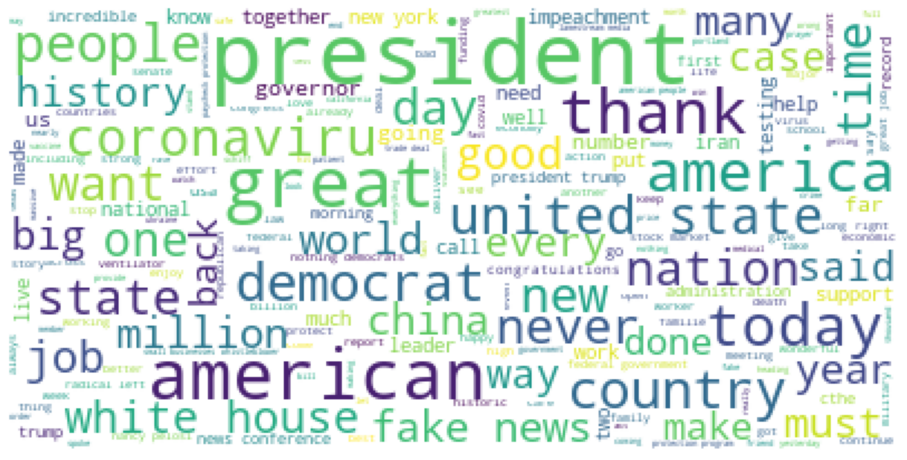

In [8]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

mpl.rcParams['figure.figsize']=(16.0,10.0)    
mpl.rcParams['font.size']=12                
mpl.rcParams['savefig.dpi']=1400             
mpl.rcParams['figure.subplot.bottom']=.1 

stopwords = set(STOPWORDS)
text = " ".join(tweet for tweet in df.Tweet)
print ("There are {} words in the combination of all tweets.".format(len(text)))

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(text))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=1400)

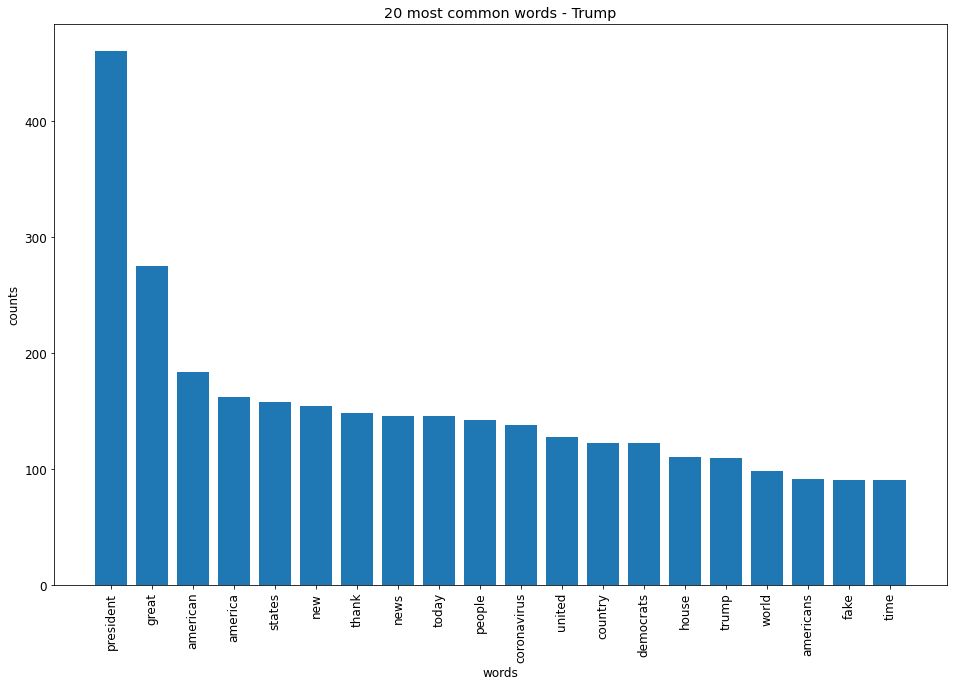

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Helper function
def plot_20_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:20]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    plt.figure(figsize=(16, 10))
    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('20 most common words - Trump')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df['Tweet'])

# Visualise the 20 most common words
plot_20_most_common_words(count_data, count_vectorizer)


## Final Display of positive, negative and neutral sentiments

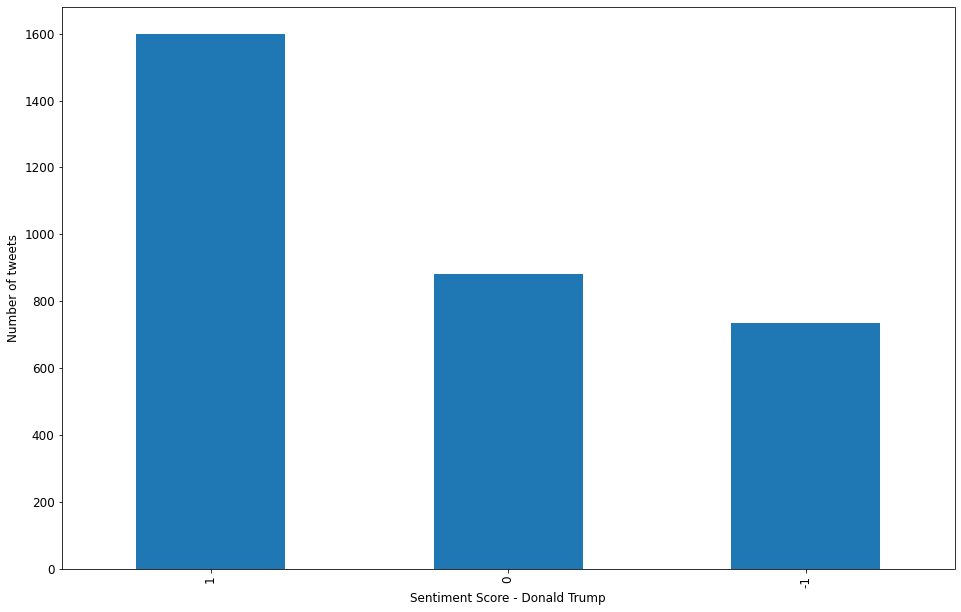

In [10]:
import matplotlib.pyplot as plt
df['VSA'].value_counts().plot(kind = 'bar')
plt.xlabel('Sentiment Score - Donald Trump')
plt.ylabel('Number of tweets')
plt.show()